In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")


In [ ]:
DATA_PATH = "/content/walmart-sales-dataset-of-45stores.csv"

df = pd.read_csv(DATA_PATH)
df.head()


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [ ]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df = df.sort_values('Date')

In [ ]:
df.isnull().sum()

,0
Store,0
Date,0
Weekly_Sales,0
Holiday_Flag,0
Temperature,0
Fuel_Price,0
CPI,0
Unemployment,0


In [ ]:
company_df = (
    df.groupby('Date')['Weekly_Sales']
    .sum()
    .reset_index()
)

company_df.head()


,Date,Weekly_Sales
0,2010-02-05,49750740.50
1,2010-02-12,48336677.63
2,2010-02-19,48276993.78
3,2010-02-26,43968571.13
4,2010-03-05,46871470.30


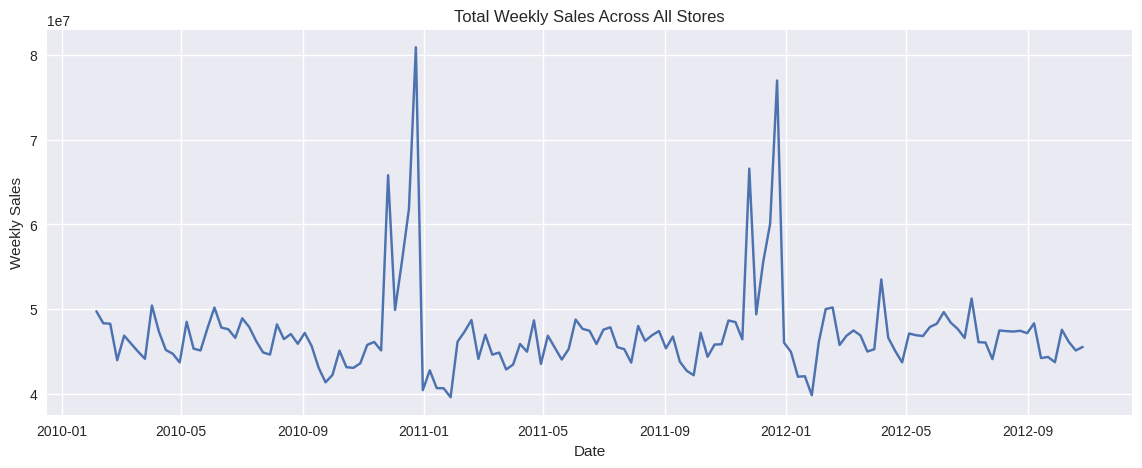

In [ ]:
plt.figure(figsize=(14,5))
plt.plot(company_df['Date'], company_df['Weekly_Sales'])
plt.title("Total Weekly Sales Across All Stores")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.show()

In [ ]:
import pandas as pd

DATA_PATH = "/content/walmart-sales-dataset-of-45stores.csv"
df = pd.read_csv(DATA_PATH)

df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df = df.sort_values('Date')


In [ ]:
company_df = (
    df.groupby('Date')['Weekly_Sales']
    .sum()
    .reset_index()
)

In [ ]:
company_df['week'] = company_df['Date'].dt.isocalendar().week
company_df['month'] = company_df['Date'].dt.month
company_df['year'] = company_df['Date'].dt.year

In [ ]:
holiday_df = (
    df.groupby('Date')['Holiday_Flag']
    .max()
    .reset_index()
)

company_df = company_df.merge(holiday_df, on='Date', how='left')
company_df.head()

,Date,Weekly_Sales,week,month,year,Holiday_Flag
0,2010-02-05,49750740.50,5,2,2010,0
1,2010-02-12,48336677.63,6,2,2010,1
2,2010-02-19,48276993.78,7,2,2010,0
3,2010-02-26,43968571.13,8,2,2010,0
4,2010-03-05,46871470.30,9,3,2010,0
